In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# K Nearest Neighbours Classifier

Best parameters set found on development set:
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

 Best Score 0.7555988245700423

 Grid scores on development set:
0.723 (+/-0.016) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.717 (+/-0.018) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.740 (+/-0.018) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.737 (+/-0.017) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.737 (+/-0.017) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.735 (+/-0.015) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.729 (+/-0.015) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.734 (+/-0.022) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.742 (+/-0.020) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.731 (+/-0.023) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.738 (+/-0.016) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.727 (+/-0.021) for {'n_neighbors': 4, 'p': 3, 'weights': 'dis

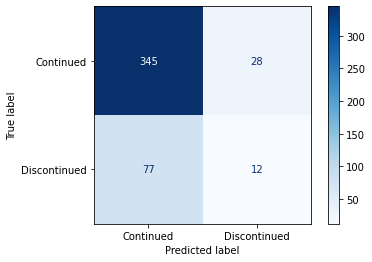

In [3]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]
#p = 1 (manhattan_distance)
#p = 2 (euclidean_distance)
#p = 3 (minkowski_distance)
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

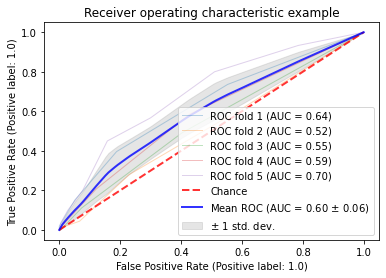

mean prec  0.7242851182148853
STD PREC 0.05152273671848515
mean recall  0.7758492322010238
STD recall 0.05152273671848515
mean f1  0.7301524022961973
STD f1 0.034152045585071865
sum of all confuion matrices
 [[1163   79]
 [ 266   31]]

average of all confuion matrices
 [[232  15]
 [ 53   6]]
[[0.94 0.06]
 [0.9  0.1 ]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_3688/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


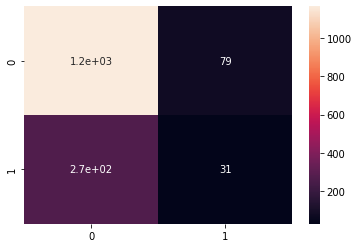

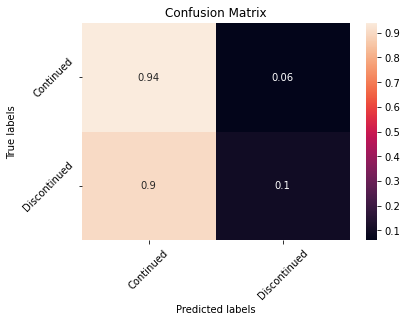

In [4]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With SMOTE Oversampling

In [5]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

 Best Score 0.8535353323179253

 Grid scores on development set:
0.827 (+/-0.022) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.842 (+/-0.019) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.793 (+/-0.027) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.812 (+/-0.023) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.779 (+/-0.025) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.795 (+/-0.022) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.834 (+/-0.018) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.854 (+/-0.020) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.799 (+/-0.024) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.818 (+/-0.017) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.783 (+/-0.028) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.802 (+/-0.020) for {'n_neighbors': 4, 'p': 3, 'weights': 'di

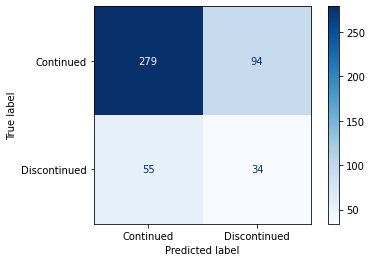

In [6]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

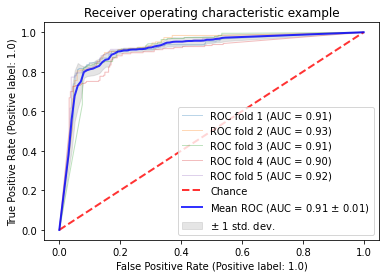

mean prec  0.8507663286983442
STD PREC 0.007258040694876457
mean recall  0.8377272727272727
STD recall 0.007258040694876457
mean f1  0.8383346073983156
STD f1 0.00732177105963856
sum of all confuion matrices
 [[972 270]
 [ 87 871]]

average of all confuion matrices
 [[194  54]
 [ 17 174]]
[[0.78 0.22]
 [0.09 0.91]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_3688/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


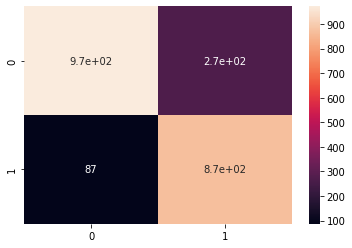

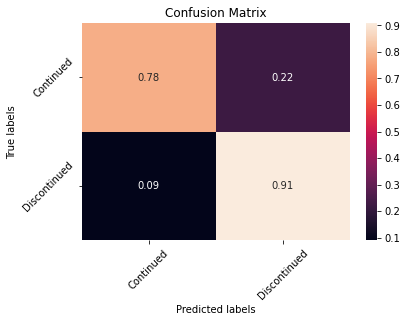

In [7]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With Borderline-SMOTE Oversampling

In [8]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

 Best Score 0.8632176541719374

 Grid scores on development set:
0.843 (+/-0.015) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.855 (+/-0.015) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.816 (+/-0.021) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.827 (+/-0.017) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.808 (+/-0.023) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.818 (+/-0.018) for {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
0.847 (+/-0.026) for {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.863 (+/-0.012) for {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.821 (+/-0.027) for {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.834 (+/-0.016) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.820 (+/-0.032) for {'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}
0.829 (+/-0.015) for {'n_neighbors': 4, 'p': 3, 'weights': 'di

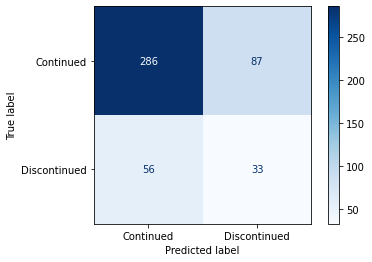

In [9]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(3,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

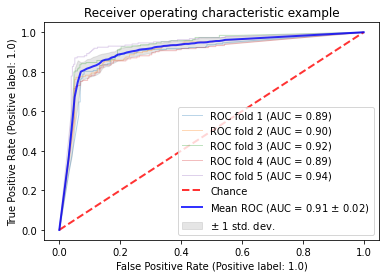

mean prec  0.8508956075946287
STD PREC 0.011868021832595096
mean recall  0.8422727272727272
STD recall 0.011868021832595096
mean f1  0.8428648626218432
STD f1 0.007674149462346677
sum of all confuion matrices
 [[1001  241]
 [ 106  852]]

average of all confuion matrices
 [[200  48]
 [ 21 170]]
[[0.81 0.19]
 [0.11 0.89]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_3688/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


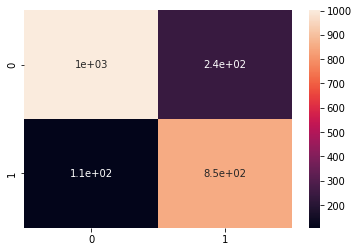

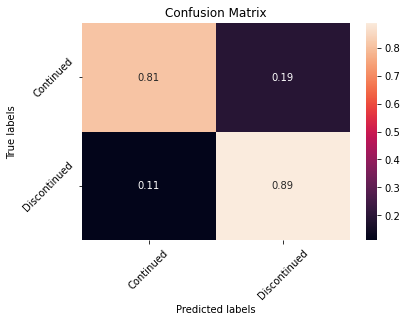

In [10]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);


# With ADASYN Oversampling

In [11]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

 Best Score 0.876400088130642

 Grid scores on development set:
0.832 (+/-0.021) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.876 (+/-0.014) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.814 (+/-0.028) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.844 (+/-0.017) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.815 (+/-0.030) for {'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}
0.834 (+/-0.027) for {'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.824 (+/-0.024) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.845 (+/-0.016) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.778 (+/-0.021) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.798 (+/-0.020) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.758 (+/-0.027) for {'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
0.781 (+/-0.026) for {'n_neighbors': 3, 'p': 3, 'weights': 'dis

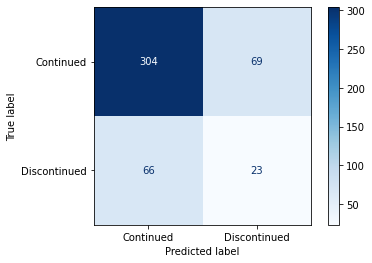

In [12]:
from sklearn.neighbors import KNeighborsClassifier #import the KNN classifier

tuned_parameters = [{
    'n_neighbors': [i for i in range(2,31,1)], 
    'p':  [k for k in range(1,4,1)],
    'weights' : ['uniform', 'distance']
    }]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

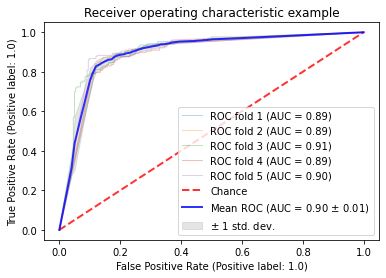

mean prec  0.8445992925231603
STD PREC 0.00681176863825484
mean recall  0.8328736379899171
STD recall 0.00681176863825484
mean f1  0.8339455328346226
STD f1 0.00964427067563646
sum of all confuion matrices
 [[984 258]
 [101 805]]

average of all confuion matrices
 [[196  51]
 [ 20 161]]
[[0.79 0.21]
 [0.11 0.89]]


C:\Users\Tasli\AppData\Local\Temp/ipykernel_3688/2009417834.py:137: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)


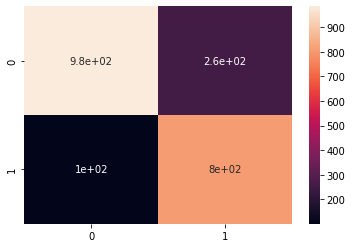

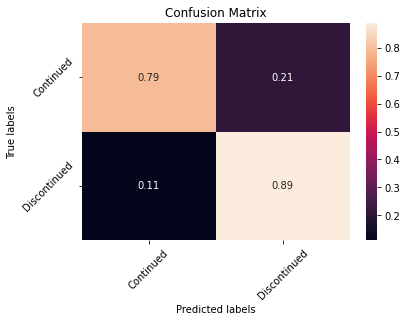

In [13]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

import seaborn as sns


from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, KFold

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

tprs = []
aucs = []
all_cm= []
precision = []
recall = []
f_measure = []

mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
kf = KFold(n_splits=5, random_state=123, shuffle=True)
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    all_cm.append(conf_mat)
    
     #calc metrics
    actual = y_test
    predicted = y_pred
    curr_macro_prec = precision_score(actual, predicted,average='weighted')
    precision.append(curr_macro_prec)
    
    curr_macro_rec = recall_score(actual, predicted,average='weighted')
    recall.append(curr_macro_rec)
    
    curr_macro_f1 = f1_score(actual, predicted,average='weighted')
    f_measure.append(curr_macro_f1)
    
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test_index],
        y[test_index],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    i +=1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


## plot macro cm

sum_all_cm=np.zeros((2,2)).astype('int64')
for j in range(i-1):
    sum_all_cm+=all_cm[j]
    
#plot 
figs=[]
for i in range(2):
    figs.append(plt.figure())


print('mean prec ', np.mean(precision))
print('STD PREC', np.std(precision))

print('mean recall ', np.mean(recall))
print('STD recall', np.std(precision))

print('mean f1 ', np.mean(f_measure))
print('STD f1', np.std(f_measure))


print("sum of all confuion matrices\n",sum_all_cm)
ax=figs[0].add_subplot()
sns.heatmap(sum_all_cm, annot=True, ax = ax);

avg_all_cm=np.divide(sum_all_cm,5).astype('int64')
print("\naverage of all confuion matrices\n",avg_all_cm)
ax=figs[1].add_subplot()
sns.heatmap(avg_all_cm, annot=True, ax = ax);


#Lets print confision matrix
labels =['Continued','Discontinued']

conf_mat= avg_all_cm/ avg_all_cm.astype(np.float).sum(axis=1,keepdims = True)
conf_mat = (np.around(conf_mat,2))
print(conf_mat)
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);
